In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import pearsonr

%matplotlib inline

##### Понятие линейной корреляции (коэффициента Пирсона)

Пусть $X, Y$ — две случайные величины

Формула коэффициента Пирсона:
<br>
<br>
$ \rho_{X, Y}= \frac{cov(X, Y)}{\sigma_X\sigma_Y} $
<br>
<br>
Знаменатель в этой формуле используется исключительно для приведения значения коэффициента к интервалу $[-1, 1]$, поэтому перейдем к числителю с ковариацией между величинами.

**Ковариация** — мера совместной изменчивости двух случайных величин, то есть: если ковариация положительна, то с ростом значений одной случайной величины, значения второй имеют тенденцию возрастать, а если знак отрицательный — то убывать.

$cov(X, Y) = E[(X - \mu_X)(Y - \mu_Y)]$

В случае с выборками, взятыми из какого-то распределения, имеем:

$cov(X_{(n)}, Y_{(n)}) = \frac{1}{n}\sum_{t=1}^{n}(X_t-\bar{X})(Y_t-\bar{Y})$

где $\bar{X}$ и $\bar{Y}$ - средние значения выборок

Ковариация будет нулевой, если величины полностью независимы, единичной -- если между ними существует строгая линейная зависимость.

##### Напишем функцию для расчета коэффициента корреляции Пирсона

In [3]:
def pearson_correlation(x, y):
    # Мы не можем рассчитать корреляцию, если векторы разной длины
    assert len(x) == len(y)
    
    # Высчитываем ковариацию по формуле
    n = len(x)
    s = 0
    mju_x = np.mean(x)
    mju_y = np.mean(y)
    for i in range(n):
        s += (x[i] - mju_x) * (y[i] - mju_y)
        
    covariance = s / n
    
    return np.round(covariance / (np.std(x) * np.std(y)), 5)

##### Сгенерируем случайные вектора

In [4]:
np.random.seed(42)

random_variable_one = np.random.rand(1000)
random_variable_two = np.random.rand(1000)

In [5]:
print(pearson_correlation(random_variable_one, random_variable_two))

0.02931


Видим, что наша функция работает правильно - между собой вектора практически некоррелированны

##### Cоздадим две одинаковых непрерывных переменных

In [6]:
np.random.seed(42)

continuous_variable_one = np.random.rand(1000)
continuous_variable_two = continuous_variable_one.copy()

assert all(continuous_variable_one == continuous_variable_two)

print(pearson_correlation(continuous_variable_one, continuous_variable_two))

1.0


##### Попробуем разбить значения во втором векторе на бины

In [7]:
bins = np.linspace(0, 1, 101)
continuous_variable_two_digit = np.digitize(continuous_variable_two, bins)
print('100 бинов:\n', pearson_correlation(continuous_variable_one, continuous_variable_two_digit))

100 бинов:
 0.99995


In [8]:
bins = np.linspace(0, 1, 11)
continuous_variable_two_digit = np.digitize(continuous_variable_two, bins)
print('10 бинов:\n', pearson_correlation(continuous_variable_one, continuous_variable_two_digit))

10 бинов:
 0.99509


In [9]:
bins = np.linspace(0, 1, 3)
continuous_variable_two_digit = np.digitize(continuous_variable_two, bins)
print('2 бина:\n', pearson_correlation(continuous_variable_one, continuous_variable_two_digit))

2 бина:
 0.86841


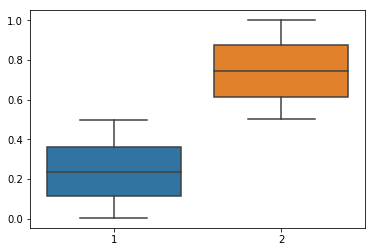

In [10]:
sns.boxplot(x=continuous_variable_two_digit, y=continuous_variable_one); # Не забываем подписывать оси ;)

##### Вывод

Можно рассматривать корреляцию между бинарным и непрерывным признаком как корреляцию между двумя непрерывными признаками, где бинарный признак получен из непрерывного путем разделения значений на два бина.

Таким же образом можно считать корреляцию между ординальными признаками (где порядок имеет значение), **но не между чисто-категориальными, где число категорий > 2**.

Нужно понимать, что это не золотая пуля выявления закономерностей между двумя величинами, а просто быстрый способ взглянуть на взаимосвязь между переменными. В случае же подозрительных корреляций -- это повод взглянуть на данные повнимательнее.